In [19]:
# 구현에 사용할 패키지 임포트하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

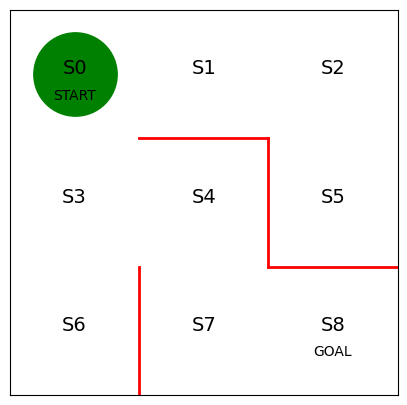

In [20]:
# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 붉은 벽 그리기
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [21]:
# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# 행은 상태 0~7, 열은 행동방향(상,우,하,좌 순)을 나타낸다.
theta_0 = np.array([
    [np.nan, 1, 1, np.nan], # s0 
    [np.nan, 1, np.nan, 1], # s1
    [np.nan, np.nan, 1, 1], # s2
    [1, 1, 1, np.nan], # s3
    [np.nan, np.nan, 1, 1], # s4
    [1, np.nan, np.nan, np.nan], # s5
    [1, np.nan, np.nan, np.nan], # s6
    [1, 1, np.nan, np.nan], # s7
])

In [22]:
# 정책 파라미터 theta를 행동정책 pi로 변환 (소프트맥스 함수 사용)하는 함수

def softmax_convert_into_pi_from_theta(theta):
    '''비율 계산에 소프트맥스 함수 사용'''
    
    beta = 1.0
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    
    exp_theta = np.exp(beta * theta)
    
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmax로 계산하는 코드
        
    pi = np.nan_to_num(pi)
    
    return pi

In [23]:
# 초기 정책 pi_0를 계산
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.    0.5   0.5   0.   ]
 [0.    0.5   0.    0.5  ]
 [0.    0.    0.5   0.5  ]
 [0.333 0.333 0.333 0.   ]
 [0.    0.    0.5   0.5  ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.5   0.5   0.    0.   ]]


In [24]:
# 행동 a를 취한 후의 상태 s를 구하는 함수

def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]의 확률을 따라, direction값이 선택된다
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 위로 이동하면 상태값이 3 줄어든다
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 아래로 이동하면 상태값이 3 늘어난다
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다

    return [action, s_next]

In [25]:
# 미로를 빠져나오는 함수, 상태와 행동의 히스토리를 출력한다

def goal_maze_ret_s_a(pi):
    s = 0 # 시작 지점
    s_a_history = [[0, np.nan]] # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트
    
    while 1:
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        
        s_a_history.append([next_s, np.nan])
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return  s_a_history

In [26]:
# 초기 정책으로 미로를 빠져나오기
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print('목표 지점에 이르기까지 걸린 단계 수는 ' + str(len(s_a_history)))

[[0, 2], [3, 0], [0, 1], [1, 3], [0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]
목표 지점에 이르기까지 걸린 단계 수는 9


In [27]:
# theta를 수정하는 함수

def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 학습률
    T = len(s_a_history) - 1 # 목표 지점에 이르기까지 걸린 단계 수
    
    [m, n] = theta.shape # theta의 행렬 크기를 구함
    delta_theta = theta.copy() # Δtheta를 구할 준비
    
    # delta_theta를 요소 단위로 계산
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])): # theta가 nan이 아닌 경우
                
                # 히스토리에서 상태 i인 것만 모아오는 리스트 컴프리헨션
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                
                # 상태 i에서 행동 j를 취한 경우만 모음
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                
                N_i = len(SA_i) # 상태 i에서 모든 행동을 취한 횟수
                N_ij = len(SA_ij)  # 상태 i에서 행동 j를 취한 횟수
                
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T
                
    new_theta = theta + eta * delta_theta
    
    return new_theta

In [28]:
# 정책 수정
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.    0.497 0.503 0.   ]
 [0.    0.497 0.    0.503]
 [0.    0.    0.5   0.5  ]
 [0.335 0.335 0.331 0.   ]
 [0.    0.    0.503 0.497]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.497 0.503 0.    0.   ]]


In [29]:
# 정책 경사 알고리즘으로 미로 빠져나오기

stop_epsilon = 10**-4 # 정책의 변화가 10^-4 보다 작아지면 학습을 종료

theta = theta_0
pi = pi_0

is_continue = True
count = 1

while is_continue:
    s_a_history = goal_maze_ret_s_a(pi) # 정책 π를 따라 미로를 탐색한 히스토리를 구함
    new_theta = update_theta(theta, pi, s_a_history) # 파라미터 Θ를 수정
    new_pi = softmax_convert_into_pi_from_theta(new_theta) # 정책 π를 수정
    
    print(np.sum(np.abs(new_pi - pi))) # 정책의 변화를 출력
    print('목표 지점에 이르기까지 걸린 단계 수는 ' + str(len(s_a_history) - 1) + '단계입니다')
    
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.01602719063998459
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
0.012432495725798853
목표 지점에 이르기까지 걸린 단계 수는 36단계입니다
0.020676552674965265
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.0034542249747333553
목표 지점에 이르기까지 걸린 단계 수는 120단계입니다
0.0062360909618225935
목표 지점에 이르기까지 걸린 단계 수는 108단계입니다
0.013782439464056273
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.032112138356974684
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01483465468119649
목표 지점에 이르기까지 걸린 단계 수는 38단계입니다
0.013152959241564621
목표 지점에 이르기까지 걸린 단계 수는 58단계입니다
0.022517893323436622
목표 지점에 이르기까지 걸린 단계 수는 40단계입니다
0.009020398541506713
목표 지점에 이르기까지 걸린 단계 수는 42단계입니다
0.016009322912575064
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.0131567237031055
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.0060740948485257795
목표 지점에 이르기까지 걸린 단계 수는 100단계입니다
0.01543523039375122
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.019696259375343694
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
0.019084481818737176
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.012210902389339084
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
0.014185683501104607
목표 지점에 이르기까지 걸린 단계 수는 66단계입니다
0.00936616937548268
목표 지점에 이르기까

In [30]:
# 학습이 끝난 정책을 확인
np.set_printoptions(precision=3, suppress=True)
print(pi)

[[0.    0.009 0.991 0.   ]
 [0.    0.284 0.    0.716]
 [0.    0.    0.491 0.509]
 [0.014 0.973 0.013 0.   ]
 [0.    0.    0.988 0.012]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.015 0.985 0.    0.   ]]


In [31]:
# 에이전터의 이동 과정을 시각화
from matplotlib import animation
from IPython.display import HTML

def init():
    # 배경 이미지 초기화
    line.set_data([], [])
    return (line,)

def animate(i):
    # 프레임 단위로 이미지 생성
    state = s_a_history[i][0] # 현재 위치
    x = (state % 3) + 0.5 # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3)  # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)


#　초기화 함수와 프레임 단위 이미지 생성한수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2860\3140089129.py:15: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
